### particle chunk concatentation type cast order



In [1]:
import numpy as np 

In [38]:
chunksize = int(1e8)
chunks = 10

In [39]:
def get_chunk(chunksize):
    # return list of arrays to concatentate    
    return np.ones((chunksize,), dtype="int")
    
    
    

In [40]:
%%timeit
chunk_list = []
for _ in range(chunks):
    chunk_list.append(get_chunk(chunksize))
    
result = np.concatenate(chunk_list, axis=0).astype("float64")

14.5 s ± 1.22 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
chunk_list = []
for _ in range(chunks):
    chunk_list.append(get_chunk(chunksize).astype("float64"))
    
result = np.concatenate(chunk_list, axis=0)

3.17 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
chunk_list = []
for _ in range(chunks):
    chunk_vals = get_chunk(chunksize)
    if chunk_vals is not None:
        chunk_vals = chunk_vals.astype("float64")
    chunk_list.append(chunk_vals)
    
result = np.concatenate(chunk_list, axis=0)

2.99 s ± 9.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
bittypes = ["16", "32", "64"]
dtypes = []
for dtype in ["int", "float"]:
    dtypes += [f"{dtype}{btype}" for btype in bittypes]
dtypes

['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [97]:
import numpy as np

vals_best = np.zeros((len(dtypes), len(dtypes)))
vals_ave = np.zeros((len(dtypes), len(dtypes)))

n = int(1e7)

for i_from, dtype_from in enumerate(dtypes):
    for i_to, dtype_to in enumerate(dtypes):
        b = np.ones((n,), dtype=dtype_from)
        print(f"from {dtype_from} to {dtype_to}")
        result = %timeit -n 20 -r 10 -o x = b.astype(dtype_to)
        vals_best[i_from, i_to] = result.best
        vals_ave[i_from, i_to] = result.average


from int16 to int16
1.83 ms ± 104 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int16 to int32
4.95 ms ± 69.9 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int16 to int64
8.59 ms ± 76.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int16 to float16
39 ms ± 201 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int16 to float32
5.18 ms ± 208 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int16 to float64
8.83 ms ± 216 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int32 to int16
3.26 ms ± 79.5 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int32 to int32
6.43 ms ± 84 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int32 to int64
9.8 ms ± 407 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int32 to float16
37.3 ms ± 145 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
from int32 to float32
5.96 ms ± 175 µs per loop (mean ± std. dev. of 10 runs, 20 lo

In [104]:
vals_ave

array([[0.00183333, 0.00494814, 0.00858758, 0.03897181, 0.00518369,
        0.00883442],
       [0.00326183, 0.00643378, 0.00980492, 0.03731136, 0.00595639,
        0.01004493],
       [0.00505699, 0.00773735, 0.01316666, 0.04003745, 0.0097958 ,
        0.0123682 ],
       [0.02775951, 0.03311304, 0.0335287 , 0.00131025, 0.02171995,
        0.03586415],
       [0.00340246, 0.00605119, 0.01056642, 0.03055845, 0.00680273,
        0.01018154],
       [0.00580139, 0.00810732, 0.01279994, 0.03560552, 0.00871935,
        0.01228621]])

In [105]:
vals_best

array([[0.00173263, 0.00487256, 0.00845992, 0.0387344 , 0.0049375 ,
        0.00862253],
       [0.00316919, 0.00628883, 0.0093055 , 0.03713874, 0.00576919,
        0.00953648],
       [0.00494247, 0.00742396, 0.01238488, 0.03989579, 0.0094871 ,
        0.0121002 ],
       [0.02765555, 0.03289047, 0.03325754, 0.0012204 , 0.02152496,
        0.03569627],
       [0.00324962, 0.0057259 , 0.01042656, 0.0303529 , 0.0064013 ,
        0.00948433],
       [0.00563293, 0.0079303 , 0.01242316, 0.03537925, 0.00809779,
        0.01211935]])

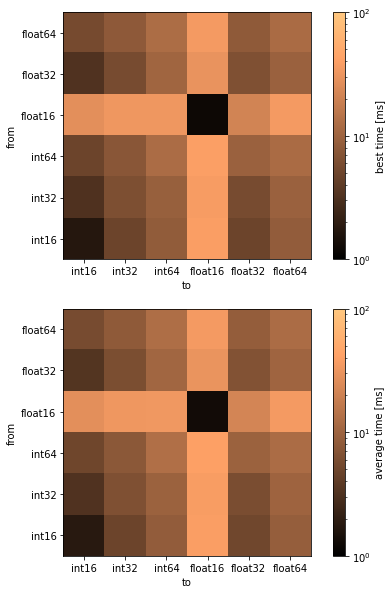

In [106]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

lnorm = LogNorm(vmin=1, vmax=100)
f,axs = plt.subplots(2, 1, figsize=(8,10))

ax = axs[0]
im = ax.imshow(vals_best*1000, cmap="copper", norm=lnorm, origin='lower')
ax.set_xticks(range(len(dtypes)))
ax.set_xticklabels(dtypes)
ax.set_xlabel("to")
ax.set_yticks(range(len(dtypes)))
ax.set_yticklabels(dtypes)
ax.set_ylabel("from")
plt.colorbar(im, ax=ax, label="best time [ms]")

ax = axs[1]
im = ax.imshow(vals_ave*1000, cmap="copper", norm=lnorm, origin='lower')
ax.set_xticks(range(len(dtypes)))
ax.set_xticklabels(dtypes)
ax.set_xlabel("to")
ax.set_yticks(range(len(dtypes)))
ax.set_yticklabels(dtypes)
ax.set_ylabel("from")
plt.colorbar(im, ax=ax, label="average time [ms]")

In [39]:
n = int(1e7)
b = np.ones((n,), dtype="int16")

In [58]:
result = %timeit -n 20 -r 10 -o x = b.astype("float64")

12.6 ms ± 556 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [61]:
result.best

0.011953547247685492

In [42]:
%%timeit -n 20 -r 10
c = b.astype("float16")

39.4 ms ± 293 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [43]:
%%timeit -n 20 -r 10
c = b.astype("float32")

5.02 ms ± 67 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [44]:
%%timeit -n 20 -r 10
c = b.astype("int64")

8.96 ms ± 384 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [45]:
b = np.ones((n,), dtype="int64")

In [46]:
%%timeit -n 20 -r 10
c = b.astype("float64")

13.1 ms ± 509 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [47]:
%%timeit -n 20 -r 10
c = b.astype("float16")

40.4 ms ± 278 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [48]:
%%timeit -n 20 -r 10
c = b.astype("float32")

9.7 ms ± 300 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [49]:
%%timeit -n 20 -r 10
c = b.astype("int16")

5.41 ms ± 357 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [12]:
b = np.ones((n,), dtype="float16")

In [13]:
%%timeit
c = b.astype("float64")

3.07 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
